In [4]:
##### ATOC7500 - monte_carlo_example - Lecture #2
##### Originally coded by Prof. Barnes (CSU), updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU)
##### Last updated: August 25, 2020
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as sio
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
%matplotlib inline

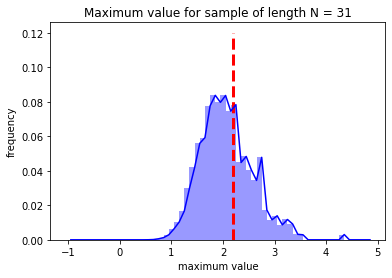

In [7]:
# In January (31 days), the maximum daily temperature was 2.2 standard deviations from the 
# climatological mean temperature.  If we assume that the daily temperature is normally distributed, 
# how rare is it to have a maximum of 2.2 standard deviations or greater in 31 daily samples?

# Note: We do not have a test for the maximum of a distribution.  This is not the mean.
# We cannot use the bootstrap approach since we do not have the population to sample from.
# However, since our null hypothesis is that the values come from a standard normal, we can create synthetic 
# data to determine the confidence interval on the maximum in a sample of N=31.  Let's Monte Carlo It!
# What do you conclude?

bin_width = .1
drawn_max = 2.2
sample_length = 31

Z = np.random.randn(10000,1)
M = np.empty([100000, 1])

for iloop in range(100000):
    ip = np.random.randint(low=0,high=Z.shape[0],size=sample_length) 
    M[iloop] = np.max(Z[ip])

bin_list = np.arange(-1,5,bin_width);
n, bins = np.histogram(M, bins=bin_list, density=False);
plt.plot([drawn_max, drawn_max],[0, .12],color='red',linewidth=3,linestyle='--');
plt.bar(bins[0:-1],n/float(len(M)),bin_width, facecolor='blue', alpha=0.4);
plt.plot(bins[0:-1]+bin_width/2,n/float(len(M)),color='blue');

plt.xlabel('maximum value');
plt.ylabel('frequency');
titlename = 'Maximum value for sample of length N = ' + str(sample_length);
plt.title(titlename);